## Self-Organizing Maps (SOM) - A General Overview

### What is a Self-Organizing Map?

A **Self-Organizing Map (SOM)**, also known as a Kohonen Map, is a type of unsupervised artificial neural network used primarily for clustering and visualizing high-dimensional data. Developed by Teuvo Kohonen, SOMs help to reduce the dimensions of data while preserving its topological structure, allowing for intuitive visualization of complex datasets.

### Key Concepts of SOM

1. **Unsupervised Learning**: 
   - SOMs work without labeled data, meaning they do not require predefined target values. Instead, they find patterns within the input data by organizing similar input vectors together.

2. **Grid-Based Structure**:
   - The SOM is a 2D grid (typically rectangular or hexagonal) where each grid cell represents a neuron or a “unit.” Each neuron has an associated weight vector, which has the same dimensions as the input data.

3. **Topological Preservation**:
   - SOMs attempt to preserve the spatial structure of the input data, meaning that similar input data points are mapped to nearby neurons in the grid. This makes SOMs useful for visualizing relationships within complex, high-dimensional data.

### How SOM Works

The training process for a SOM involves iteratively adjusting the grid’s weight vectors to match the patterns in the input data. This process can be divided into three primary steps:

1. **Initialization**:
   - SOM weight vectors are initialized, often randomly, with values similar to the input data's scale.

2. **Competitive Process**:
   - For each input vector, the **Best Matching Unit (BMU)** is identified. This is the neuron with the smallest distance to the input vector (typically using Euclidean distance).

3. **Updating Neurons**:
   - The BMU and its neighboring neurons are adjusted to become more like the input vector. This process uses two key parameters:
     - **Learning Rate**: Determines how much the weights are adjusted per iteration.
     - **Neighborhood Function**: Defines the influence range of the BMU on neighboring neurons. The influence typically decays over time, gradually focusing updates on the BMU alone.

### Key Parameters in SOM Training

- **Learning Rate**: Controls how quickly the SOM adapts to the input data. It decreases over time to stabilize the map.
- **Neighborhood Function**: Defines the region around the BMU that will be affected by each update. This function also decays over time, allowing the map to fine-tune itself as training progresses.

### Applications of SOMs

Self-Organizing Maps are widely used in areas that benefit from clustering and dimensionality reduction, including:

- **Data Visualization**: Representing high-dimensional data in an interpretable 2D map.
- **Clustering and Pattern Recognition**: Identifying patterns in complex datasets.
- **Anomaly Detection**: Detecting outliers by identifying data points that do not fit into any clusters.

### Advantages and Limitations

- **Advantages**:
  - SOMs are effective for visualizing and clustering high-dimensional data.
  - They preserve the topological structure of data, allowing for intuitive exploration of relationships within datasets.

- **Limitations**:
  - The training process can be computationally intensive, especially for large grids or high-dimensional data.
  - SOMs may not scale well to very large datasets, and the output can be influenced by initial weight values.


# Mathematical explanation
The Self-Organizing Map (SOM) algorithm transforms high-dimensional data into a lower-dimensional grid while preserving the topological relationships. Here’s a mathematical explanation of each step:

### Training Process Intuition:
1. The SOM grid starts with random weights.
2. For each input, the BMU is identified based on closeness in feature space.
3. The BMU and its neighbors adjust their weights to better "match" the input.
4. Over time, the learning rate and neighborhood radius decrease, allowing fine-tuned adjustments.
5. After training, similar inputs are mapped to nearby nodes on the grid.

This process allows the SOM to organize itself into a meaningful representation of the input space, preserving topological relationships.

---

### 1. **Initialization**
Each node (neuron) in the SOM grid is initialized with a weight vector $ \mathbf{w}_{i} $ of the same dimension as the input data. These weights are typically initialized randomly.

$$
\mathbf{w}_{i}(0) \sim \text{Uniform}[0, 1], \quad i = 1, 2, \dots, N
$$

where $ N $ is the number of nodes in the SOM grid.

---

### 2. **Input Sample**
At each training step $ t $, a sample vector $ \mathbf{x} \in \mathbb{R}^d $ is randomly chosen from the dataset.

---

### 3. **Best Matching Unit (BMU)**
The BMU is the node whose weight vector is closest to the input vector $ \mathbf{x} $ in terms of Euclidean distance. Mathematically:

$$
\text{BMU} = \arg \min_{i} \|\mathbf{x} - \mathbf{w}_{i}(t)\|
$$

where:
- $ \|\mathbf{x} - \mathbf{w}_{i}\| = \sqrt{\sum_{j=1}^d (x_j - w_{i,j})^2} $
- $ \mathbf{w}_{i} \in \mathbb{R}^d $ is the weight vector of the $ i $-th node.

---

### 4. **Neighborhood Function**
The BMU and its neighbors are updated during each training step. The neighborhood function determines the influence of the BMU on its neighbors. A common choice is a Gaussian function:

$$
h_{i, \text{BMU}}(t) = \exp\left(-\frac{\|\mathbf{r}_{i} - \mathbf{r}_{\text{BMU}}\|^2}{2\sigma(t)^2}\right)
$$

where:
- $ \mathbf{r}_{i} $ and $ \mathbf{r}_{\text{BMU}} $ are the positions of the $ i $-th node and the BMU in the grid.
- $ \sigma(t) $ is the neighborhood radius, which decreases over time:
  $$
  \sigma(t) = \sigma_0 \exp\left(-\frac{t}{\tau}\right)
  $$
  where $ \sigma_0 $ is the initial radius and $ \tau $ is the time constant.

---

### 5. **Learning Rate**
The learning rate controls the step size for weight updates. It decreases over time to allow convergence:

$$
\eta(t) = \eta_0 \exp\left(-\frac{t}{\tau}\right)
$$

where:
- $ \eta_0 $ is the initial learning rate.
- $ \tau $ is the time constant.

---

### 6. **Weight Update**
The weight vectors of the BMU and its neighbors are updated to move closer to the input vector $ \mathbf{x} $. The update rule is:

$$
\mathbf{w}_{i}(t+1) = \mathbf{w}_{i}(t) + \eta(t) h_{i, \text{BMU}}(t) (\mathbf{x} - \mathbf{w}_{i}(t))
$$

where:
- $ \mathbf{w}_{i}(t) $ is the weight vector of node $ i $ at time $ t $.
- $ \mathbf{x} $ is the input vector.
- $ \eta(t) $ is the learning rate.
- $ h_{i, \text{BMU}}(t) $ is the neighborhood function.

---

### 7. **Repeat for Multiple Iterations**
Steps 2–6 are repeated for a predefined number of iterations or until convergence.

---

### Summary of Key Equations
1. **BMU Identification**:
   $$
   \text{BMU} = \arg \min_{i} \|\mathbf{x} - \mathbf{w}_{i}(t)\|
   $$
2. **Neighborhood Function**:
   $$
   h_{i, \text{BMU}}(t) = \exp\left(-\frac{\|\mathbf{r}_{i} - \mathbf{r}_{\text{BMU}}\|^2}{2\sigma(t)^2}\right)
   $$
3. **Weight Update**:
   $$
   \mathbf{w}_{i}(t+1) = \mathbf{w}_{i}(t) + \eta(t) h_{i, \text{BMU}}(t) (\mathbf{x} - \mathbf{w}_{i}(t))
   $$

---

### Key Parameters:
- $ \eta(t) $: Learning rate, controls the magnitude of weight updates.
- $ \sigma(t) $: Neighborhood radius, controls the extent of BMU influence.



# Python code by scratch

## Import Required Libraries

This cell imports essential libraries for data handling (`pandas`, `numpy`), visualization (`matplotlib`), and random sampling. Additionally, `mpl_toolkits.mplot3d` is imported for 3D plotting.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random as rand

## Load and Display Data

This cell loads the dataset from a CSV file into a `pandas` DataFrame and prints the first few rows to check the contents. The data is then converted to a 2D `numpy` array for efficient numerical computations.

In [14]:
# Load data from CSV and display the first few rows
df = pd.read_csv('test_data.csv')
print(df.head())

# Extract values from DataFrame as a 2D numpy array
input_data = df.values

          X         Y         Z
0  0.812327  0.385401  0.359206
1  0.868781  0.259367  0.273578
2  0.814705  0.393944  0.246055
3  0.622144  0.468073  0.287725
4  0.790177  0.315158  0.372890


## Visualize Input Data in 3D Space

This cell visualizes the dataset in 3D space, using the first three dimensions (x, y, z coordinates) for each data point. The scatter plot provides insight into the distribution and structure of the input data.

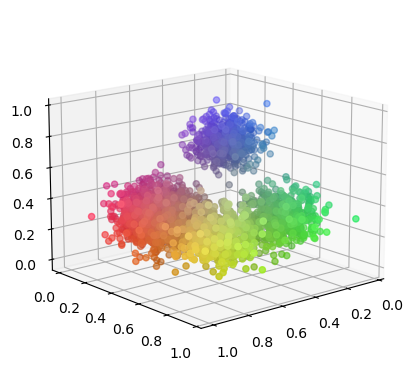

In [15]:
# Plot data in 3D space for visualization
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
x_coords, y_coords, z_coords = input_data[:, 0], input_data[:, 1], input_data[:, 2]  # Extract x, y, z components
ax.scatter(x_coords, y_coords, z_coords, marker='o', c=input_data)  # Plot data points in 3D
ax.view_init(15, 50)  # Set initial view angle for the plot
plt.show()

## Check Data Dimensions

This cell calculates and displays the number of samples (rows) and dimensions (columns) in the input data. 

In [16]:
# Get dimensions of input data
num_samples = input_data.shape[0]  # Number of samples (input vectors)
num_dimensions = input_data.shape[1]  # Number of dimensions per input vector (3 dimensions here)

print('Input data has', num_samples, 'samples (vectors)')
print('Each sample has', num_dimensions, 'dimensions')

Input data has 3500 samples (vectors)
Each sample has 3 dimensions


## Define SOM Grid Dimensions

Here, the dimensions of the Self-Organizing Map (SOM) grid are defined as a 100x100 grid, which will serve as the output domain for the neural network.

In [17]:
# Set up SOM grid dimensions
grid_rows = 50  # Number of rows in SOM grid
grid_cols = 50  # Number of columns in SOM grid
print('SOM output domain (neural networks) is a rectangular grid')

SOM output domain (neural networks) is a rectangular grid


## Set Training Parameters

This cell sets the training parameters for the SOM, including the number of iterations, learning rate, and neighborhood function decay rates. These parameters control the learning behavior over time.

In [18]:
# Define training parameters
num_iterations = 5000  # Total number of training iterations
learning_decay, max_learning_rate, neighborhood_decay = 0.25, 0.1, 0.5  # Learning rate and neighborhood decay parameters
learning_rate_decay_time = num_iterations * learning_decay  # Determines decay rate for learning rate
initial_neighborhood_radius = grid_rows * neighborhood_decay  # Determines initial neighborhood size

## Initialize Index Map for Grid

This block creates an index map that assigns each SOM grid cell a pair of coordinates (row, column), which will be used in distance calculations from the Best Matching Unit (BMU).

In [19]:
# Create index map for grid, storing row and column indices for each cell
grid_indices = np.zeros([grid_rows, grid_cols, 2])
for row in range(grid_rows):
    for col in range(grid_cols):
        grid_indices[row, col] = row, col  # Assign each cell a (row, column) coordinate

## Initialize SOM Grid with Random Values

The SOM grid is initialized with random values for each grid cell. This plot shows the initial state of the SOM grid, providing a baseline before training begins.

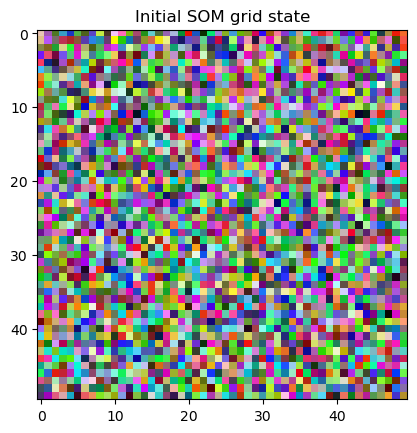

In [23]:
# Initialize SOM grid with random values
som_grid = np.random.uniform(low=0, high=1, size=[grid_rows, grid_cols, num_dimensions])

# Plot the initial SOM grid state
plt.imshow(som_grid)
plt.title("Initial SOM grid state")
plt.show()

## SOM Training Loop

This block contains the main training loop for the SOM:

- **Step 1**: Select a random input vector.
- **Step 2**: Identify the Best Matching Unit (BMU) by calculating Euclidean distances between the selected vector and all grid units, then selecting the closest unit.
- **Step 3**: Update the SOM grid based on the current learning rate and neighborhood function, which decay over time. The grid units closer to the BMU receive a greater update.
- **Visualization**: The neighborhood function is plotted in the first iteration, and the SOM grid is displayed at specific intervals to monitor training progression.

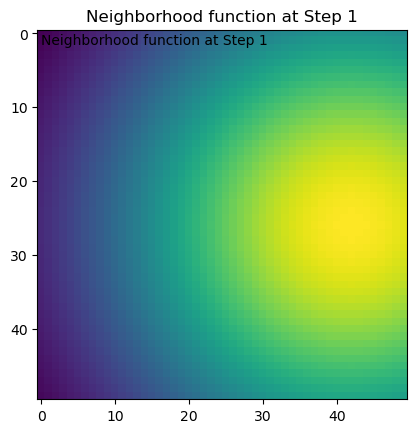

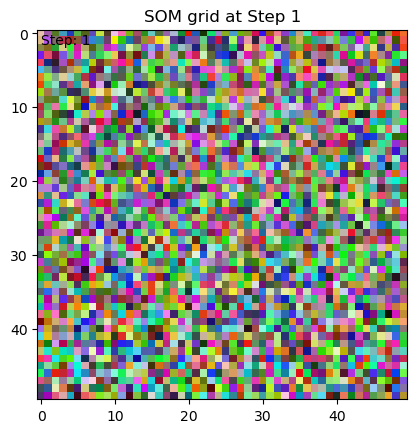

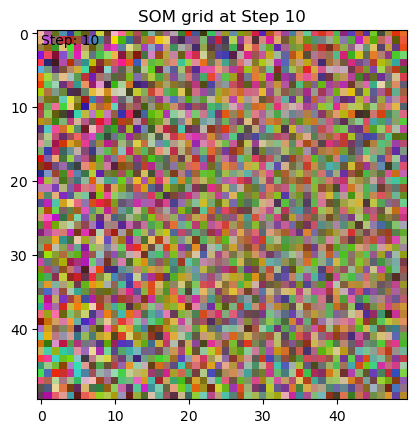

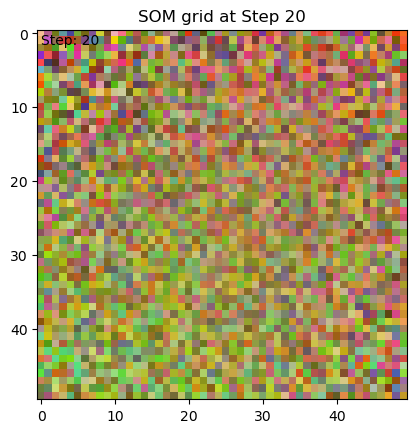

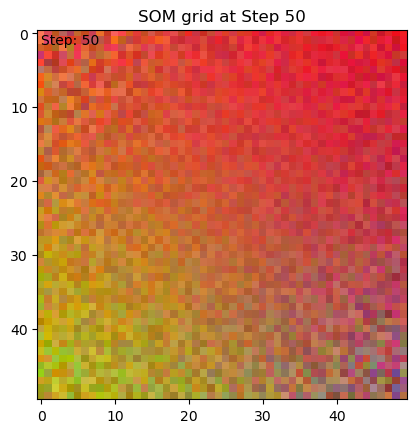

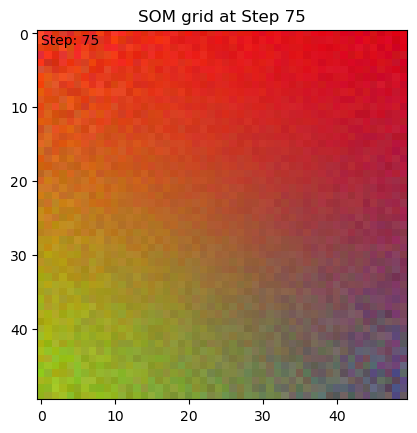

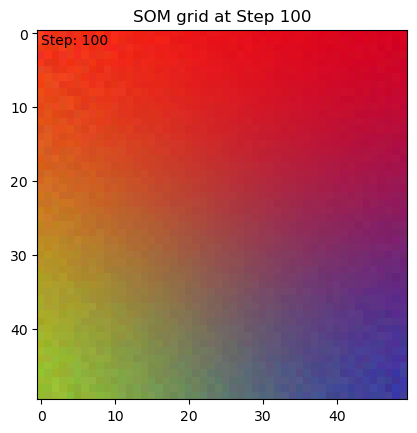

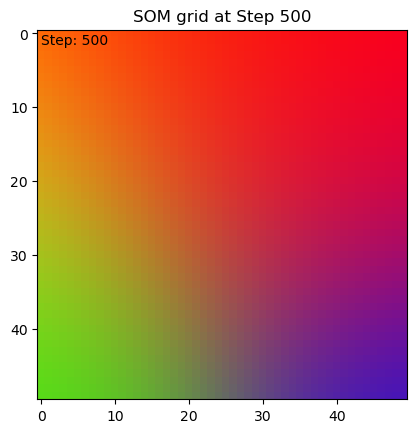

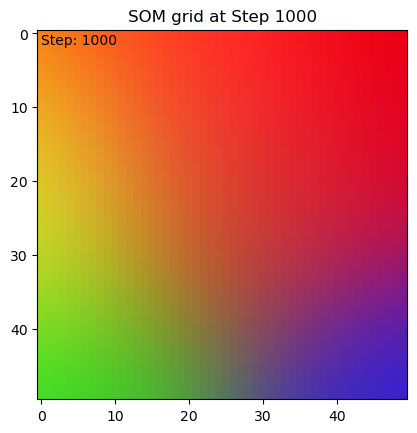

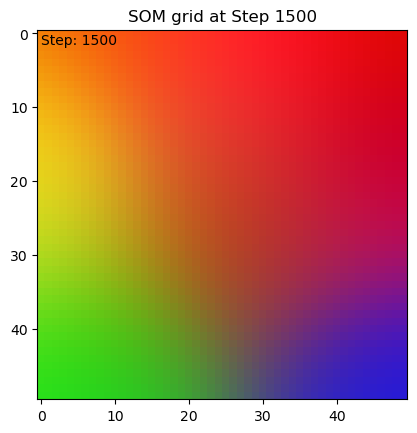

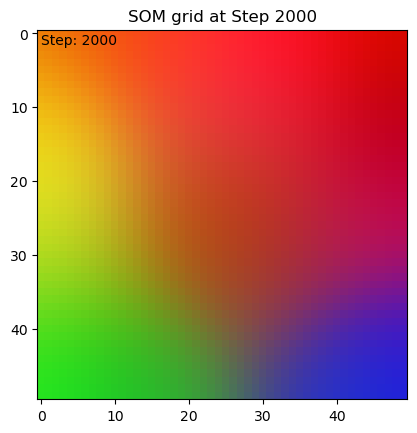

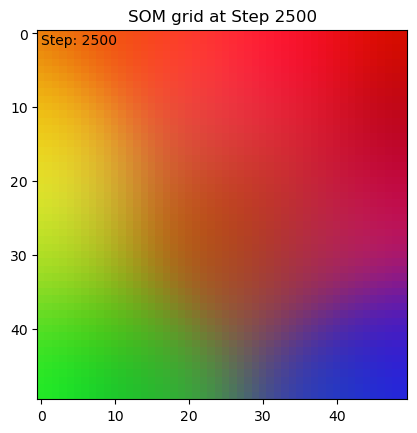

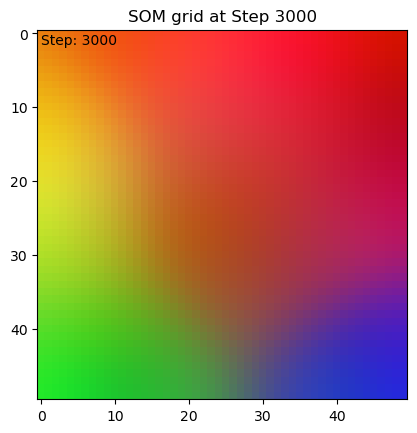

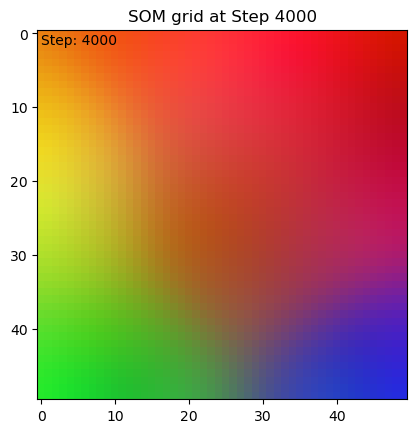

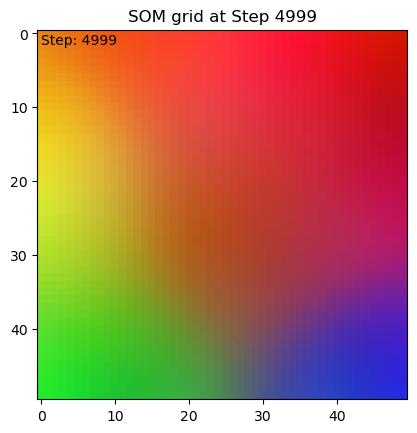

In [24]:
# Training loop for SOM
for iteration in range(num_iterations):
    
    # Step 1: Select a random input vector from the dataset
    random_index = rand.randint(0, input_data.shape[0] - 1)  # Random index selection
    selected_vector = input_data[random_index]  # Selected input vector
    
    # Step 2: Find Best Matching Unit (BMU) on the grid
    
    # Step 2-1: Calculate the difference between the selected input vector and each unit in the SOM grid
    difference = som_grid - selected_vector  # Broadcasts to calculate difference for each dimension
    # Step 2-2: Compute the Euclidean distance for each grid unit from the input vector
    distance_to_input = np.linalg.norm(difference, axis=2)  # Reduces along the dimension axis to get 2D distances
    # Step 2-3: Find the index of the unit with the smallest distance to the input vector
    flat_bmu_index = np.argmin(distance_to_input)  # Finds the flat index of the minimum distance
    bmu_index = np.unravel_index(flat_bmu_index, som_grid.shape[:2])  # Converts flat index to 2D grid coordinates
     
    # Step 3: Update SOM grid
    # Step 3-1: Calculate learning rate and neighborhood function for current iteration
    current_learning_rate = max_learning_rate * np.exp(-iteration / learning_rate_decay_time)  # Decaying learning rate
    current_neighborhood_radius = initial_neighborhood_radius * np.exp(-iteration / learning_rate_decay_time)  # Decaying neighborhood radius
    distance_from_bmu = np.linalg.norm(grid_indices - bmu_index, axis=2)  # Distance from BMU to other cells
    neighborhood_influence = np.exp(-distance_from_bmu**2 / (2 * current_neighborhood_radius**2))  # Neighborhood function (Gaussian decay)

    # Step 3-2: Update grid values based on learning rate and neighborhood function
    som_grid += current_learning_rate * neighborhood_influence[:, :, np.newaxis] * (selected_vector - som_grid)

    # Visualize the neighborhood function at the first iteration
    if iteration == 0:
        plt.imshow(neighborhood_influence)
        plt.title("Neighborhood function at Step 1")
        plt.text(0, 0, 'Neighborhood function at Step 1', va='top')
        plt.show()
        print('=' * 20, '\n' * 10, '=' * 20)

    # Plot the SOM grid state at specific iterations
    if iteration in [1, 10, 20, 50, 75, 100, 500, 1000, 1500, 2000, 2500, 3000, 4000, num_iterations - 1]:
        normalized_grid = (som_grid - som_grid.min()) / (som_grid.max() - som_grid.min())
        plt.imshow(normalized_grid)
        plt.title(f"SOM grid at Step {iteration}")
        plt.text(0, 0, f'Step: {iteration}', va='top')
        plt.show()